# IMPORTING PACKAGES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# READ THE FILE AS DATA

In [2]:
data=pd.read_table("data_file.tsv",sep='\t')

In [3]:
# TO KNOW THE NOF ROWS AND COLUMNS
data.shape

(61460, 16)

In [4]:
data.dtypes# TO KNOW THE VALUE TYPES OF COLUMNS

tax_id                                     int64
GeneID                                     int64
Symbol                                    object
LocusTag                                  object
Synonyms                                  object
dbXrefs                                   object
chromosome                                object
map_location                              object
description                               object
type_of_gene                              object
Symbol_from_nomenclature_authority        object
Full_name_from_nomenclature_authority     object
Nomenclature_status                       object
Other_designations                        object
Modification_date                        float64
Feature_type                              object
dtype: object

In [5]:
data.head()# TO VIEW TOP LINES OF CODE

,tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,9606,1,A1BG,-,A1B|ABG|GAB|HYST2477,MIM:138670|HGNC:HGNC:5|Ensembl:ENSG00000121410,19,19q13.43,alpha-1-B glycoprotein,protein-coding,A1BG,alpha-1-B glycoprotein,O,alpha-1B-glycoprotein|HEL-S-163pA|epididymis s...,20181208.0,-
1,9606,2,A2M,-,A2MD|CPAMD5|FWP007|S863-7,MIM:103950|HGNC:HGNC:7|Ensembl:ENSG00000175899,12,12p13.31,alpha-2-macroglobulin,protein-coding,A2M,alpha-2-macroglobulin,O,alpha-2-macroglobulin|C3 and PZP-like alpha-2-...,20181229.0,-
2,9606,3,A2MP1,-,A2MP,HGNC:HGNC:8|Ensembl:ENSG00000256069,12,12p13.31,alpha-2-macroglobulin pseudogene 1,pseudo,A2MP1,alpha-2-macroglobulin pseudogene 1,O,pregnancy-zone protein pseudogene,20180329.0,-
3,9606,9,NAT1,-,AAC1|MNAT|NAT-1|NATI,MIM:108345|HGNC:HGNC:7645|Ensembl:ENSG00000171428,8,8p22,N-acetyltransferase 1,protein-coding,NAT1,N-acetyltransferase 1,O,arylamine N-acetyltransferase 1|N-acetyltransf...,20181207.0,-
4,9606,10,NAT2,-,AAC2|NAT-2|PNAT,MIM:612182|HGNC:HGNC:7646|Ensembl:ENSG00000156006,8,8p22,N-acetyltransferase 2,protein-coding,NAT2,N-acetyltransferase 2,O,arylamine N-acetyltransferase 2|N-acetyltransf...,20181223.0,-


In [6]:
data.isnull().sum()# TO KNOW THE COUNT OF NULL VALUES

tax_id                                   0
GeneID                                   0
Symbol                                   0
LocusTag                                 0
Synonyms                                 0
dbXrefs                                  4
chromosome                               4
map_location                             4
description                              4
type_of_gene                             4
Symbol_from_nomenclature_authority       4
Full_name_from_nomenclature_authority    4
Nomenclature_status                      4
Other_designations                       4
Modification_date                        9
Feature_type                             9
dtype: int64

In [7]:
data['dbXrefs'].describe()

count     61456
unique    43622
top           -
freq      17831
Name: dbXrefs, dtype: object

In [8]:
data.dropna(inplace=True)# DROP THE NULL VALUES

In [9]:
new = data["dbXrefs"].str.split("|", n = 2, expand = True) #SPLIT THE IDENTIFIERS 

In [10]:
data["entries"]= new[0] #SPLITED IDENTIFIERS ADDED AS NEW COLUMNS IN DATASET AS ENTRIES

In [11]:
data.head()

,tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type,entries
0,9606,1,A1BG,-,A1B|ABG|GAB|HYST2477,MIM:138670|HGNC:HGNC:5|Ensembl:ENSG00000121410,19,19q13.43,alpha-1-B glycoprotein,protein-coding,A1BG,alpha-1-B glycoprotein,O,alpha-1B-glycoprotein|HEL-S-163pA|epididymis s...,20181208.0,-,MIM:138670
1,9606,2,A2M,-,A2MD|CPAMD5|FWP007|S863-7,MIM:103950|HGNC:HGNC:7|Ensembl:ENSG00000175899,12,12p13.31,alpha-2-macroglobulin,protein-coding,A2M,alpha-2-macroglobulin,O,alpha-2-macroglobulin|C3 and PZP-like alpha-2-...,20181229.0,-,MIM:103950
2,9606,3,A2MP1,-,A2MP,HGNC:HGNC:8|Ensembl:ENSG00000256069,12,12p13.31,alpha-2-macroglobulin pseudogene 1,pseudo,A2MP1,alpha-2-macroglobulin pseudogene 1,O,pregnancy-zone protein pseudogene,20180329.0,-,HGNC:HGNC:8
3,9606,9,NAT1,-,AAC1|MNAT|NAT-1|NATI,MIM:108345|HGNC:HGNC:7645|Ensembl:ENSG00000171428,8,8p22,N-acetyltransferase 1,protein-coding,NAT1,N-acetyltransferase 1,O,arylamine N-acetyltransferase 1|N-acetyltransf...,20181207.0,-,MIM:108345
4,9606,10,NAT2,-,AAC2|NAT-2|PNAT,MIM:612182|HGNC:HGNC:7646|Ensembl:ENSG00000156006,8,8p22,N-acetyltransferase 2,protein-coding,NAT2,N-acetyltransferase 2,O,arylamine N-acetyltransferase 2|N-acetyltransf...,20181223.0,-,MIM:612182


In [12]:
#data['entries'].value_counts().plot(kind='bar')

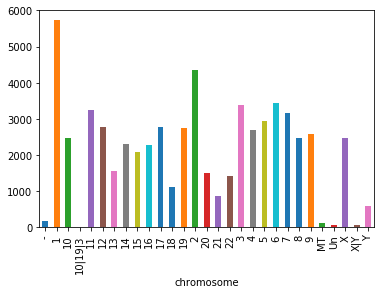

In [13]:
gr=data.groupby('chromosome').entries.count()
gr.plot(kind='bar')# to view the counts of chromosome of regarding to entries

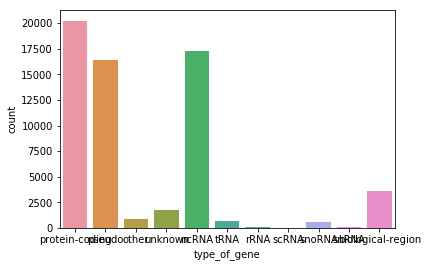

In [14]:
gr1=sns.countplot(data=data,x='type_of_gene')#to view the no of type of code for entries

# Displaying the type of gene  which are pseudo and no of entries and values and their respective chromosomes

In [15]:
g22=data[data['type_of_gene']=='pseudo'].groupby('entries').chromosome.value_counts()
g22


entries                  chromosome
-                        X             266
                         1             265
                         2             241
                         5             213
                         7             202
                         4             171
                         11            151
                         6             150
                         15            139
                         12            138
                         8             138
                         9             128
                         3             121
                         16            115
                         19            103
                         17             95
                         22             83
                         14             80
                         18             52
                         20             38
                         Un             30
                         10             28
                  